In [29]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
gauss = pd.read_table('http://conteudo.icmc.usp.br/pessoas/campello/Data_Sets/9Gauss.txt',
                      header = 0,
                      sep = '\t').drop(['  ATTRIBUTE 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
gauss.columns = ['x1', 'x2']
display(gauss.head())
display(gauss.shape)

,x1,x2
0,1.03,1.33
1,0.71,1.27
2,1.16,0.58
3,1.42,1.09
4,0.34,1.27


(900, 2)

In [30]:
k_means = KMeans(n_clusters = 9, random_state = 3, n_init = 100)
k_means.fit(gauss)
melhor_j_gauss = k_means.inertia_
melhor_j_gauss

401.91751779416825

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.17it/s]


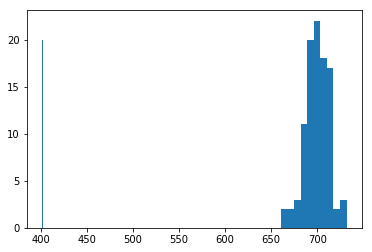

In [39]:
lista_j = []
for i in tqdm(range(0, 100)):
    dist_uniforme = gauss.copy()
    dist_uniforme.x1 = np.random.uniform(np.min(gauss.x1),np.max(gauss.x1),900)
    dist_uniforme.x2 = np.random.uniform(np.min(gauss.x2),np.max(gauss.x2),900)
    k_means = KMeans(n_clusters = 9, random_state = 3)
    k_means.fit(dist_uniforme)
    lista_j.append(k_means.inertia_)
fig, ax = plt.subplots()
ax.hist(lista_j)
ax.bar(melhor_j_gauss, 20)
plt.show()